In [167]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os
import random
import re


In [2]:
json_list = os.listdir("/Users/snorris/manyTDE/data/sources/")
del json_list[64]

In [5]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
from astropy.constants import h
from astropy.constants import k_B

In [27]:
def BB_flux(temp,luminosity, filter_frequency):
    """
    function takes temperature,luminosity, and an array of each filter frequency and returns the absolute blackbody flux for each wavelength
    """
    abs_BB_flux = (2*h*(filter_frequency**3)/c**2)*(((2.718281828459045**((h*filter_frequency)/(k_B*temp)))-1)**(-1))
    return(abs_BB_flux)

In [28]:
BB_flux(2*10**4*u.Kelvin,10**44*(u.erg/u.s),((10000*u.angstrom).to(u.Hz, equivalencies = u.spectral())))

<Quantity 3.77229186e-07 Hz3 s3 J / m2>

In [214]:
wave_list = np.arange(500,10500,100)*u.angstrom
def BB_TDE(temp,luminosity, filter_wavelength):
    """
    function takes temperature,luminosity, and an array of each filter frequency and returns the absolute blackbody flux for each wavelength
    """
    abs_BB_flux = []
    for x in range(len(wave_list)):
        abs_BB_flux.append((2*h*(((filter_wavelength[x]).to(u.Hz, equivalencies = u.spectral()))**3)/c**2)*((2.718281828459045**((h*((filter_wavelength[x]).to(u.Hz, equivalencies = u.spectral()))/(k_B*temp)))-1)**(-1)))
    newlist = [abs_BB_flux[i].to_value() for i in range(len(wave_list))]
    BB_spec = plt.plot(filter_wavelength,newlist)
    #plt.yscale('log')
    plt.ylabel('Blackbody Radiance(Hz^3s^2J/m^2)')
    plt.xlabel('wavenlength(Angstroms)')
    plt.title('Blackbody Spectrum of Hypothetical TDE')
    return(BB_spec)

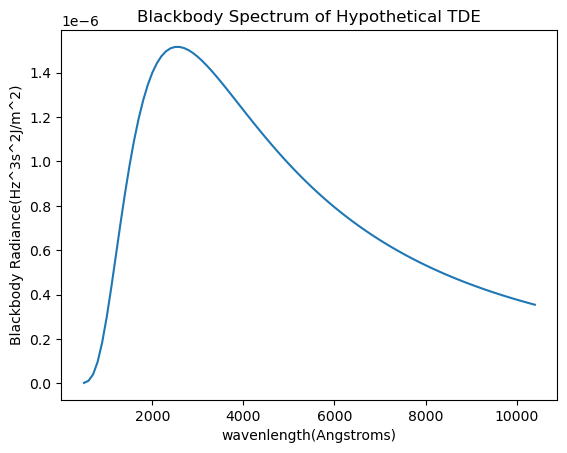

In [215]:
BB_TDE(2*10**4*u.Kelvin,10**44*(u.erg/u.s),wave_list)